# **Project : text detection**

In [7]:
! pip install Pillow pytesseract easyocr -q

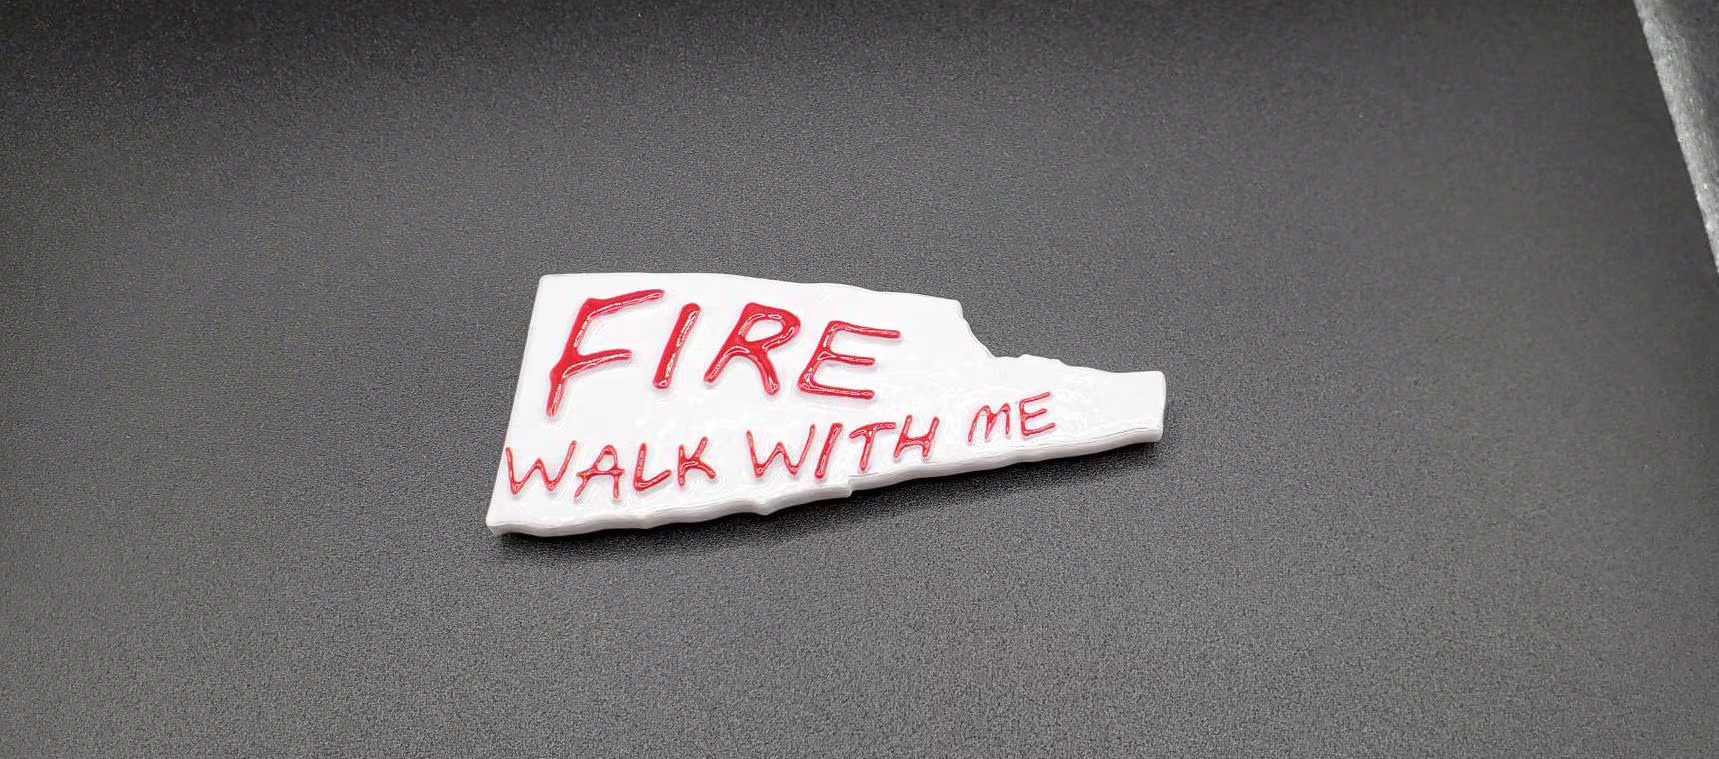

In [4]:
# Display used image
from PIL import Image

# Open the image
img = Image.open("text_on_image.jpg")

# Display the image (in Colab/Jupyter, simply typing the variable name shows it)
img

### **Tesseract** -> dont work good for those taks

In [13]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
0 upgraded, 0 newly installed, 0 to remove and 2 not upgraded.


In [17]:
import pytesseract
from PIL import Image

image_path = '/content/text_on_image.jpg'

text = pytesseract.image_to_string(Image.open(image_path), lang='eng') # Image.open is optional here, Image.open loads the image file from your hard drive into your computer's RAM so your Python code can actually touch, see, and edit it.

print(text)


### **EasyOCR**

In [19]:
from easyocr import Reader

reader = Reader(['en'])
result = reader.readtext('text_on_image.jpg')
print(result)

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[([[np.int32(539), np.int32(285)], [np.int32(913), np.int32(285)], [np.int32(913), np.int32(421)], [np.int32(539), np.int32(421)]], 'FiRE', np.float64(0.49121230840682983)), ([[np.int32(493), np.int32(398)], [np.int32(955), np.int32(398)], [np.int32(955), np.int32(515)], [np.int32(493), np.int32(515)]], 'WALK WITK', np.float64(0.4084978028029702)), ([[np.float64(961.1264929534973), np.float64(392.2553746325904)], [np.float64(1061.5605048308403), np.float64(380.7478492470044)], [np.float64(1065.8735070465027), np.float64(441.7446253674096)], [np.float64(965.4394951691596), np.float64(454.2521507529956)]], 'ME', np.float64(0.9987960769124791))]


In [24]:
text = ""

for res in result:
  text = text + res[1] + ' '

print(text[:-1])

FiRE WALK WITK ME


### **Jaccard Similarity**

In [25]:
def jaccard_similarity(sentence1, sentence2):
    # 1. Lowercase and split into sets
    set1 = set(sentence1.lower().split())
    set2 = set(sentence2.lower().split())

    # 2. Calculate Intersection and Union
    intersection_size = len(set1.intersection(set2))
    union_size = len(set1.union(set2))

    # 3. Compute Ratio
    if union_size == 0:
        return 0.0
    return intersection_size / union_size

# Your specific data
ground_truth = "FIRE WALK WITH ME"
detected_text = text

score = jaccard_similarity(ground_truth, detected_text)
print(f"Jaccard Score: {score}")

Jaccard Score: 0.6
